# Bergische Universität Wuppertal #

**Fakultät Mathematik und Naturwissenschaften** 

**Angewandte Mathematik/Numerische Analysis**

*Dr. L. Teng*

*L. Kapllani, M.Sc.* 

*Summerterm 2021*


# Computational Finance I
**Lab-Exercise No. 4**


## Write your data

In [1]:
print("First Name: Aleksandar")
print("Sure Name: Mitic ")
print("Matriculation number: 2035177 ")
print("E-mail: mitic.aleksandar@yahoo.com ")
print("Degree Type: Master") # Bachelor or Master
print("Degree Name: Master of Science ") # E.g. Master of Science in Computer Simulation in Science

First Name: Aleksandar
Sure Name: Mitic 
Matriculation number: 2035177 
E-mail: mitic.aleksandar@yahoo.com 
Degree Type: Master
Degree Name: Master of Science 


# For the programming task write the corresponding Python codes that are asked in each section below.

# P 4:  SDE simulation in option pricing
The Euler-Maruyama method and the Milstein method can be used to approximate a stochastic differential equation.
Consider the geometric Brownian motion
$$ {\rm d}S_t = \mu S_t \; {\rm d}t + \sigma S_t \; {\rm d}W_t. $$

## Import all necessary modules

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import integrate

# Start coding
**Note:** 
* Add code where you find the comment "# Add code here"
* Get the same output as it is presented in the Markdown text **Expected Output:**

## Define a function to implement Euler-Maruyama method to approximate the SDE

In [3]:
def euler_maruyama(mu, sigma, S0, h, N, dW):
    """"
    Function to implements Euler-Maruyama method to simulate SDEs
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
    """

    S = np.zeros(N+1)
    S[0] = S0
    
    for i in range(1, N+1):
        S[i] = S[i-1] + mu*S[i-1]*h + sigma*S[i-1]*dW[i-1]
    return S

## Define a function to implement Milstein method to approximate the SDE

In [4]:
def milstein(mu, sigma, S0, h, N, dW):
    """"
    Function to implements Milstein method to simulate SDEs
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step, dW E R^M
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion, S E R^(M+1)
    """
    S = np.zeros(N+1)
    S[0] = S0
    
    for i in range(1, N+1):
        S[i] = S[i-1] + mu*h*S[i-1] + sigma*S[i-1]*dW[i-1] + 0.5*sigma**2*S[i-1]*(dW[i-1]**2 - h)
    return S

Implement above methods with $\mu=0.06$ and $\sigma=0.3$ and initial value $S_0=50$ for $t \in [0,1]$ and plot some paths (e.g. 50) using $h=10^{-2}$. 

## Input parameters

In [5]:
# Input parameters
mu = 0.06
sigma = 0.3
S0 = 50
t0 = 0
T = 1

## Plot $50$ paths using each method

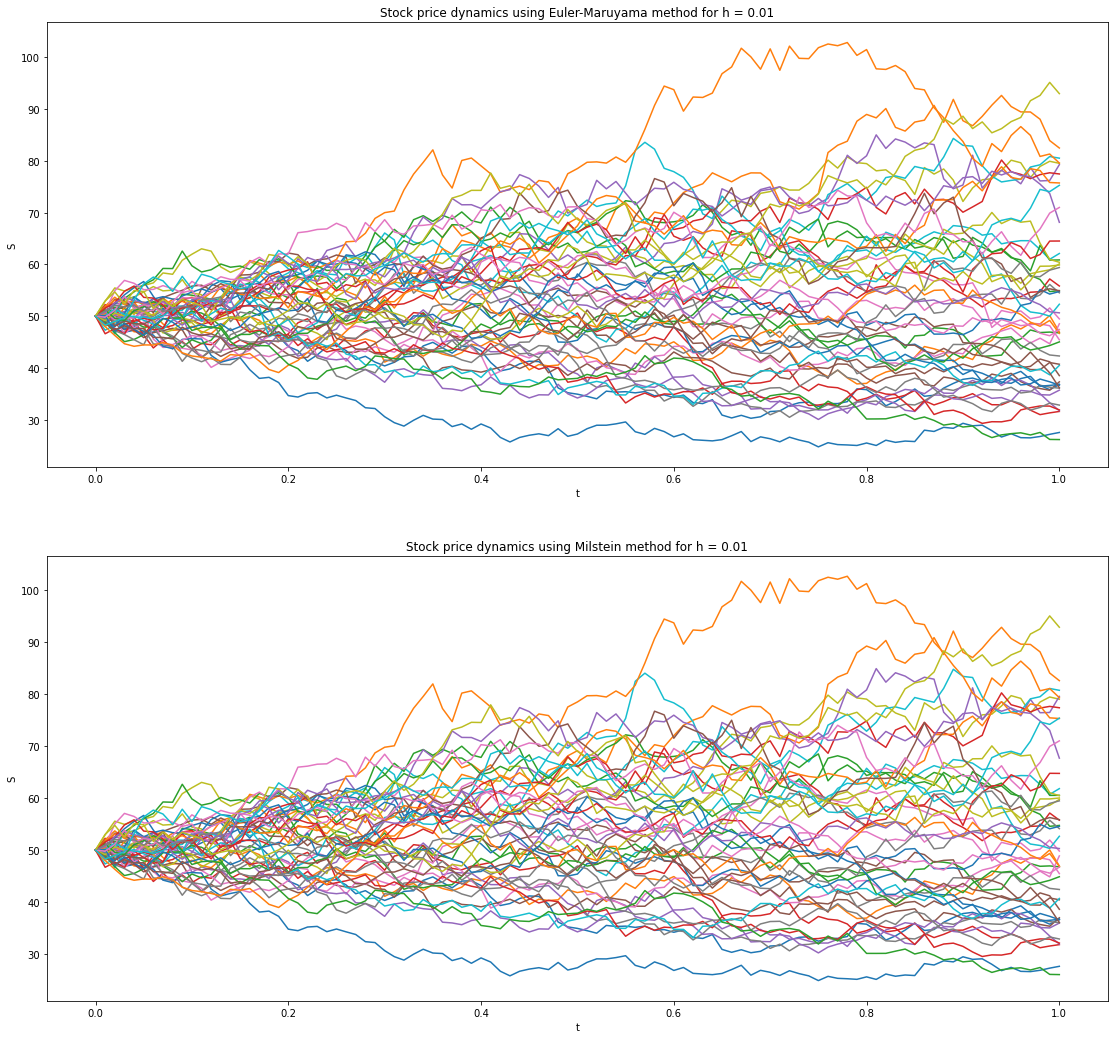

In [6]:
M = 50
h = 10**(-2)

N = int(1 / h) # number of time points

# prepare plot
fig1 = plt.figure(figsize=(19, 18))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
x = np.linspace(0, 1, N + 1)

# 50 simulations
for j in range(0, M):
  
  # create random BM
  dW = np.zeros(N)
  for i in range(0, N):
    dW[i] = np.sqrt(h) * np.random.normal(loc=0.0, scale=1.0)
  
  # Euler Maruyama
  S_EM = euler_maruyama(mu, sigma, S0, h, N, dW)
  ax1.plot(x, S_EM)
  ax1.title.set_text("Stock price dynamics using Euler-Maruyama method for h = 0.01")
  ax1.set_xlabel('t')
  ax1.set_ylabel('S')

  # Milstein
  S_M = milstein(mu, sigma, S0, h, N, dW)
  ax2.plot(x, S_M)
  ax2.title.set_text("Stock price dynamics using Milstein method for h = 0.01")
  ax2.set_xlabel('t')
  ax2.set_ylabel('S')

plt.show()

**Expected Output (Note that you may not get exactly the same plot due to randomness of BM):**

`Euler Maruyama`
![title](fig1.png)

`Milstein`
![title](fig2.png)


Compare the approximations $\hat{S}_T$ using the both methods to the exact solution $S_T$ by computing the error $\widehat{\epsilon}$  defined by
$$
\widehat{\epsilon}(h):=\frac{1}{M}\sum_{k=1}^{M}\left|S_{T,k} - \hat{S}_{T,k} \right|
$$
for $M=100$ different paths. Use the step sizes $h=10^{-i}$ for $i=1,2,3,4$ and thus 
try to estimate the rate of strong convergence in each method (`hint`: take the `log` and then apply linear regression to estimate the strong order of convergence).

## Define a function to implement Geomteric Brownian Motion solution 

In [7]:
def GBM(mu, sigma, S0, h, N, dW):
    """"
    Function to implements GBM solution
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
    """
    S = np.zeros(N+1)
    S[0] = S0
    
    for i in range(1, N+1):
        S[i] = S[i-1] * np.exp((mu-sigma**2/2)*h + sigma*dW[i-1])
    return S

## Check the errors and estimate strong convergence order

 h       err_EM      err_M
---------------------------------
 0.1000  7.9394e-01  8.7511e-02
 0.0100  3.1485e-01  9.6345e-03
 0.0010  8.1926e-02  7.3210e-04
 0.0001  2.7975e-02  9.6478e-05



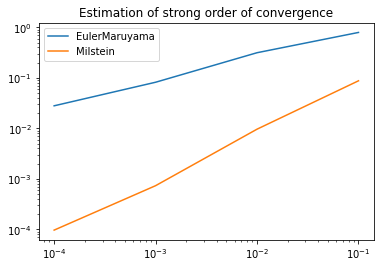

Strong convergence order of Euler Maruyama is c = 0.4944
Strong convergence order of Milstein is c = 0.9992


In [10]:
h = [10**(-1), 10**(-2), 10**(-3), 10**(-4)]
M = 100

# output for the table
print(' h       err_EM      err_M')
print('---------------------------------')
# output for the plot
eps_EM = np.zeros(len(h))
eps_M = np.zeros(len(h))

# calculate the error for every step size h=[0.1,0.01,0.001,0.0001]
for i in range(0, len(h)):
    N = int(1 / h[i]) # number of time points
    sum_EM = 0
    sum_M = 0

  # calculate the term sum(abs(S_{T,k} - S_{T,k}^{^}))
    for j in range(0, M):
    # create random BM
        dW = np.zeros(N)
        for q in range(0, N):
            dW[q] = np.sqrt(h[i])*np.random.normal(loc=0.0, scale=1.0)
        S_EM = euler_maruyama(mu, sigma, S0, h[i], N, dW)
        S_M = milstein(mu, sigma, S0, h[i], N, dW)
        S_GBM = GBM(mu, sigma, S0, h[i], N, dW) # exact solution
        sum_EM = sum_EM + abs(S_GBM[N] - S_EM[N]) # only last elements
        sum_M = sum_M + abs(S_GBM[N] - S_M[N])

  # calculate eps(h)
    err_EM = 1/M * sum_EM 
    err_M = 1/M * sum_M
    print(' %4.4f %11.4e %11.4e'  %(h[i], err_EM, err_M))
    eps_EM[i] = err_EM
    eps_M[i] = err_M

print()

# estimate strong convergence, take the log
plt.loglog(h,eps_EM, label = 'EulerMaruyama')
plt.loglog(h,eps_M, label = 'Milstein')
plt.title(r'Estimation of strong order of convergence')
plt.legend()
plt.show()

# estimate the order (slope) with linear congression
x = abs(np.log10(h).reshape((-1, 1)))
y1 = abs(np.log10(abs(eps_EM)))
y2 = abs(np.log10(abs(eps_M)))
e_m = LinearRegression().fit(x, y1) 
m = LinearRegression().fit(x, y2) 
print('Strong convergence order of Euler Maruyama is c = %.4f' %(abs(e_m.coef_)))
print('Strong convergence order of Milstein is c = %.4f' %(abs(m.coef_)))

**Expected Output (Note that you may not get exactly the same plot due to randomness of BM):**

`Errors`
![title](fig3.png)

`Convergence orders`
![title](fig4.png)


In addition to the given parameter values of the geometric Brownian motion above, we set $K=50$ (strike) and $r=0.05$ (interest rate).
Apply the Euler-Maruyama and the Milstein method to approximate the European Call-option with the payoff
$$
(S_T- K)^+,
$$
and compare your results to the Black-Schloes solution for different $M$. What can you observe?

`BONUS:`Instead of the European Call-option we consider an Asian-option which has the payoff  
$$
\left(\frac{1}{T}\int_0^T  S_T- K\right)^+.
$$
Price the Asian-option for the same parameter values using the both methods.

`Hint:` Approximate the integral using numerical itegration methods, e.g. Simpson Rule.


## Define a function to implement Black Scholes formula

In [11]:
def BlackScholes(S0, K, r, T, sigma):
    """"
    Function to implements Black Scholes formula for European Call option
    
    Input: 
        S0    -> Stock price today
        K     -> Strike price
        r     -> Interest rate
        T     -> Maturity
        sigma -> volatility
    Output:
        C     -> Fair value of European Call price
    """
    d1 = ( log(S0/K) + (r+sigma*sigma/2.0)*T ) / ( sigma*sqrt(T) )
    d2 = d1 - sigma*sqrt(T)
    # BC-Formula for European Call option
    C = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return C

## Compare the results using paths $M = [10, 100, 1000]$ with step size $h=10^{-4}$

In [12]:
K = 50
r = 0.05
M = [10, 100, 1000]

h = 10**(-4)
N = int(1/h)

# output for the table
print('M         C_BS            C_EM          err_EM            C_M           err_M             A_C_EM          A_C_M')
print('-----------------------------------------------------------------------------------------------------------------')
C_BS = BlackScholes(S0, K, r, T, sigma)
C_EM = np.zeros(len(M))
err_EM = np.zeros(len(M))
C_M = np.zeros(len(M))
err_M = np.zeros(len(M))
A_C_EM = np.zeros(len(M))
A_C_M = np.zeros(len(M))

# create M=10,100,1000 paths and calculate the sum of the payoff
for i in range(0, len(M)):
    m = M[i]
    sum_EM = 0.0
    sum_M = 0.0
    sum_A_EM = 0.0
    sum_A_M = 0.0

    for w in range(0, m):
    # create random BM
        dW = np.zeros(N)
        for p in range(0, N):
            dW[p] = np.sqrt(h)*np.random.normal(loc=0.0, scale=1.0)

        S_EM = euler_maruyama(r, sigma, S0, h, N, dW)
        S_M = milstein(r, sigma, S0, h, N, dW)
        payoff_EM = max(S_EM[N] - K, 0)
        payoff_M = max(S_M[N] - K, 0)
        sum_EM = sum_EM + payoff_EM
        sum_M = sum_M + payoff_M

    # Asian option
        x = np.linspace(0,1,N+1)
        payoff_A_EM = max(integrate.simps(S_EM, x) - K, 0)
        payoff_A_M = max(integrate.simps(S_M, x) - K, 0)
        sum_A_EM = sum_A_EM + payoff_A_EM
        sum_A_M = sum_A_M + payoff_A_M

    C_EM[i] = np.exp(-r) * sum_EM / m # calculate the average
    C_M[i] = np.exp(-r) * sum_M / m
    A_C_EM[i] = np.exp(-r) * sum_A_EM / m
    A_C_M[i] = np.exp(-r) * sum_A_M / m

    err_EM[i] = abs(C_BS - C_EM[i])
    err_M[i] = abs(C_BS - C_M[i])
    print(' %4d %12.6f %15.6f %15.4e %15.6f %15.4e %15.6f %15.6f'  %(M[i], C_BS, C_EM[i], err_EM[i], C_M[i], err_M[i], A_C_EM[i], A_C_M[i]))

M         C_BS            C_EM          err_EM            C_M           err_M             A_C_EM          A_C_M
-----------------------------------------------------------------------------------------------------------------
   10     7.115627        3.090250      4.0254e+00        3.092486      4.0231e+00        2.196077        2.199142
  100     7.115627        7.649474      5.3385e-01        7.653758      5.3813e-01        3.771751        3.772483
 1000     7.115627        7.498713      3.8309e-01        7.496966      3.8134e-01        3.926562        3.925959


**Expected Output (Note that you may not get exactly the same plot due to randomness of BM):**


![title](fig5.png)

**Return the solutions of the programming task $\href{https://moodle.uni-wuppertal.de/mod/assign/view.php?id=798903}{{here}}$ until Monday, July 19. The assignment can be done in groups of 1-2 persons. The solution should be presented within the following 2 weeks via an online arranged ZOOM meeting with M.Sc. Lorenc Kapllani.**

In [11]:
# feel free to use this cell for additional tests

In [12]:
# feel free to use this cell for additional tests

In [13]:
# feel free to use this cell for additional tests

In [14]:
# feel free to use this cell for additional tests

In [15]:
# feel free to use this cell for additional tests